In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (accuracy_score, f1_score, classification_report,confusion_matrix,confusion_matrix,ConfusionMatrixDisplay)
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [11]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

In [13]:
features = ['Pclass', 'Sex', 'Age', 'Fare' , 'Embarked']
df = df [ features + ['Survived']]

In [15]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\OLINA\AppData\Local\Temp\ipykernel_31036\1592810841.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)
C:\Users\OLINA\AppData\Local\Temp\ipykernel_31036\1592810841.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [17]:
for col in ['Sex','Embarked']:
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col])

In [19]:
X = df[features]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}


=== Random Forest ===
Accuracy: 0.79
F1 Score: 0.74
Classification Report:
              precision    recall  f1-score   support

        Died       0.81      0.83      0.82       105
    Survived       0.75      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



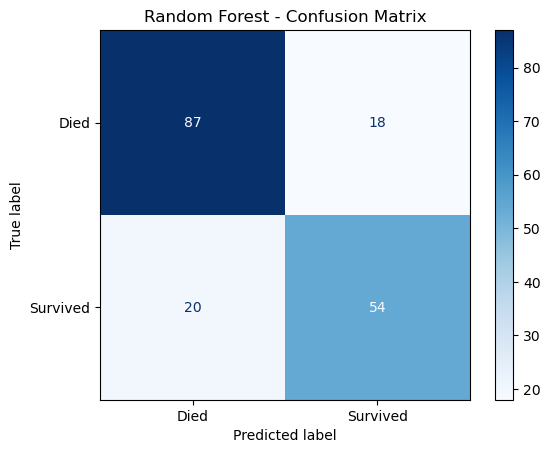

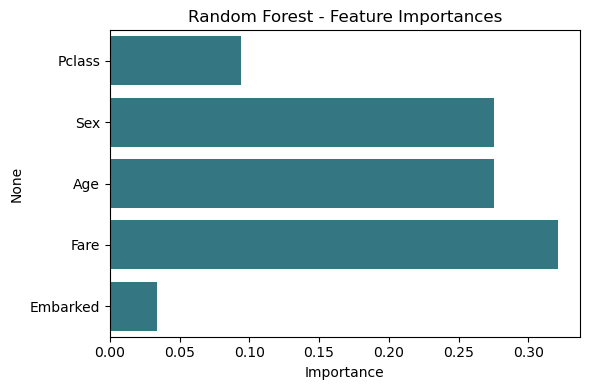

C:\Users\OLINA\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



=== AdaBoost ===
Accuracy: 0.83
F1 Score: 0.79
Classification Report:
              precision    recall  f1-score   support

        Died       0.84      0.87      0.85       105
    Survived       0.80      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



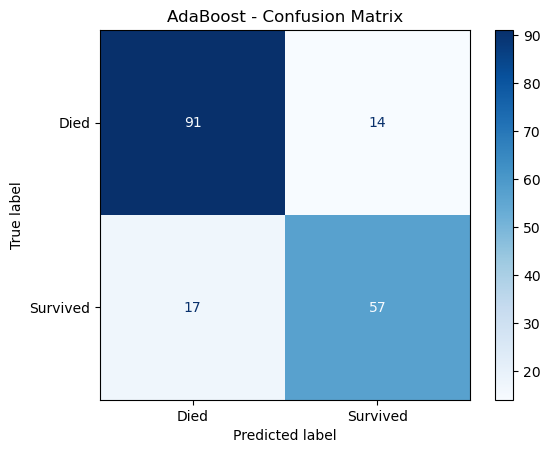

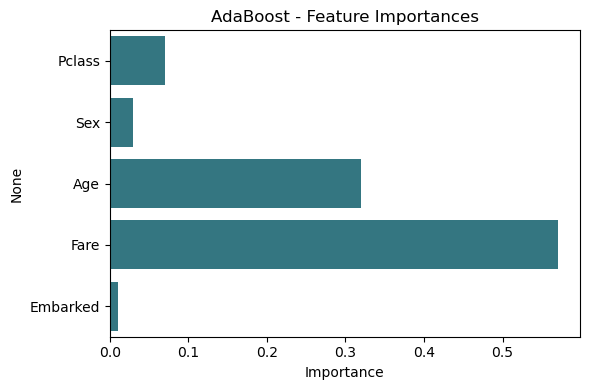


=== Gradient Boosting ===
Accuracy: 0.82
F1 Score: 0.76
Classification Report:
              precision    recall  f1-score   support

        Died       0.81      0.90      0.85       105
    Survived       0.83      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179



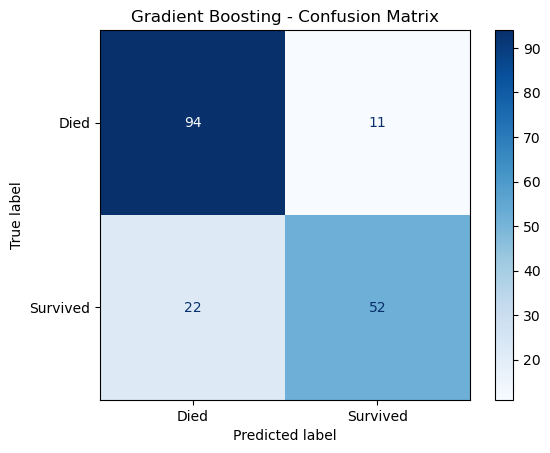

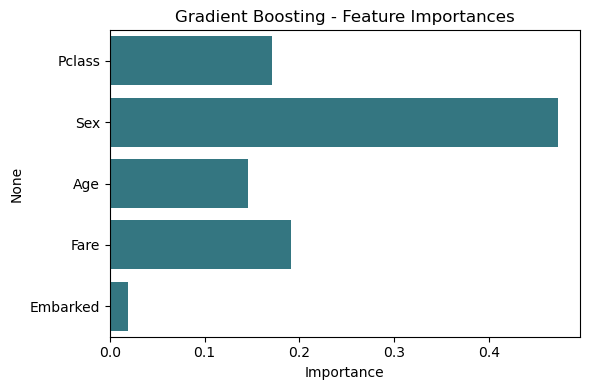

In [25]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append((name, acc, f1))

    print(f"\n=== {name} ===")
    print(f"Accuracy: {acc:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=["Died", "Survived"]))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Died", "Survived"])
    disp.plot(cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()
    plt.close()

    if hasattr(model, "feature_importances_"):
        importances = pd.Series(model.feature_importances_, index=features)
        plt.figure(figsize=(6,4))
        # Use hue with palette or solid color to avoid seaborn warning
        sns.barplot(x=importances.values, y=importances.index, color=sns.color_palette("viridis")[2])
        plt.title(f"{name} - Feature Importances")
        plt.xlabel("Importance")
        plt.tight_layout()
        plt.show()


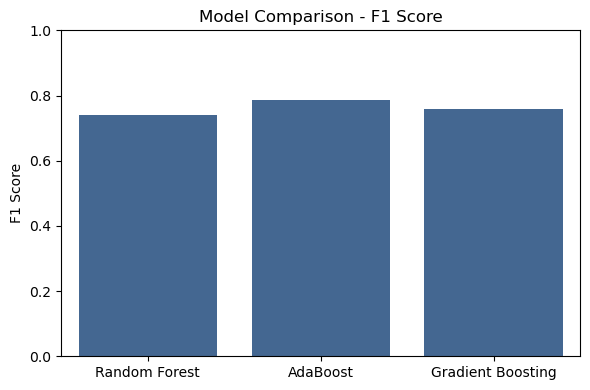

In [27]:
labels = [r[0] for r in results]
f1_scores = [r[2] for r in results]

plt.figure(figsize=(6,4))
sns.barplot(x=labels, y=f1_scores, color=sns.color_palette('mako')[2])
plt.title("Model Comparison - F1 Score")
plt.ylabel("F1 Score")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()